# Sieć Hopfielda
https://en.wikipedia.org/wiki/Hopfield_network

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
N=100 # rozmiar sieci
X=zeros(N) # stany neuronów
W=zeros((N,N)) # wagi połączeń

## Definiujemy wzorce

In [3]:
# przykładowe wzorce graficzne
pat=zeros((4,100))
pat[0] = array([1,1,0,0,0,0,0,0,1,1,
      1,1,1,0,0,0,0,1,1,1,
      0,1,1,1,0,0,1,1,1,0,
      0,0,1,1,1,1,1,1,0,0,
      0,0,0,1,1,1,0,0,0,0,
      0,0,0,0,1,1,1,0,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,1,1,1,0,0,1,1,1,0,
      1,1,1,0,0,0,0,1,1,1,
      1,1,0,0,0,0,0,0,1,1])
pat[1] = array([0,0,0,0,0,1,0,0,0,0,
      0,0,0,0,1,1,1,0,0,0,
      0,0,0,0,1,1,1,0,0,0,
      0,0,0,1,1,1,1,1,0,0,
      0,0,0,1,1,0,1,1,0,0,
      0,0,1,1,1,0,1,1,1,0,
      0,0,1,1,0,0,0,1,1,0,
      0,1,1,1,0,0,0,1,1,1,
      0,1,1,1,1,1,1,1,1,1,
      0,1,1,1,1,1,1,1,1,1])
pat[2] = array([0,0,1,1,1,0,0,0,1,1,
      0,1,1,1,1,1,1,1,1,1,
      1,1,1,0,1,1,1,1,0,0,
      1,1,0,0,0,1,1,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,1,1,0,0,0,1,1,
      0,0,1,1,1,1,0,1,1,1,
      1,1,1,1,1,1,1,1,1,0,
      1,1,0,0,0,1,1,1,0,0,
      0,0,0,0,0,0,0,0,0,0])
pat[3] = array([0,0,1,0,0,0,0,1,0,0,
      0,0,1,1,0,0,1,1,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,1,1,1,1,1,1,1,1,0,
      1,1,1,1,1,1,1,1,1,1,
      0,0,0,1,1,1,1,0,0,0,
      0,0,0,0,1,1,0,0,0,0,
      0,0,0,0,0,1,0,0,0,0])

# przeskalowanie do {-1, 1}
pat=2*pat-1

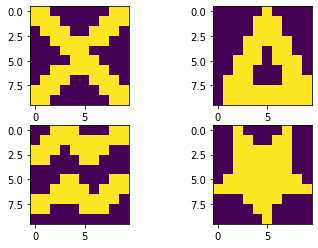

In [4]:
i=1
for p in pat:
    subplot(2,2,i)
    i+=1
    imshow(reshape(p,(10,10)))

## Trenujemy sieć za pomocą reguły Hebba
https://en.wikipedia.org/wiki/Hebbian_theory

In [5]:
def train():
    global W, pat
    W=pat.T @ pat / pat.shape[0]
    W-=eye(N,N)

In [6]:
# co to @?
?dot

Docstring:
dot(a, b, out=None)

Dot product of two arrays. Specifically,

- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).

- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using :func:`matmul` or ``a @ b`` is preferred.

- If either `a` or `b` is 0-D (scalar), it is equivalent to :func:`multiply`
  and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.

- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.

- If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
  sum product over the last axis of `a` and the second-to-last axis of `b`::

    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

Parameters
----------
a : array_like
    First argument.
b : array_like
    Second argument.
out : ndarray, optional
    Output argument. This must have the exact kind that would be returned
    if it was not used. In particular, it must have the r

In [7]:
# %%timeit
train()

In [8]:
W

array([[ 0. ,  1. , -0.5, ...,  0. ,  0.5,  0.5],
       [ 1. ,  0. , -0.5, ...,  0. ,  0.5,  0.5],
       [-0.5, -0.5,  0. , ..., -0.5, -1. , -1. ],
       ...,
       [ 0. ,  0. , -0.5, ...,  0. ,  0.5,  0.5],
       [ 0.5,  0.5, -1. , ...,  0.5,  0. ,  1. ],
       [ 0.5,  0.5, -1. , ...,  0.5,  1. ,  0. ]])

## Testujemy sieć zaburzonymi wzorcami

In [9]:
# wzorce zaburzone
pat_test=pat.copy()
pat_test[0][int(N/2):].fill(1)
pat_test[1]*=choice([-1,1],100,p=[0.25,0.75]) # 1/4 odwrócona
pat_test[2]*=choice([-1,1],100) # połowa 
pat_test[3]*=choice([-1,1],100,p=[0.75,0.25]) # 3/4 odwrócone

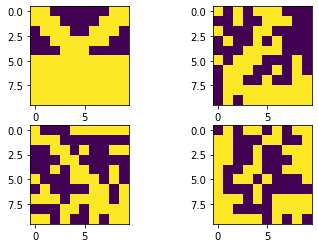

In [10]:
i=1
for p in pat_test:
    subplot(2,2,i)
    i+=1
    imshow(reshape(p,(10,10)))

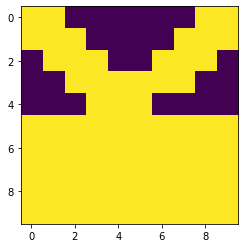

In [11]:
X=pat_test[0]
imshow(reshape(X,(10,10)))

By wykonać wielokrotnie poniższą komórkę, naciskaj CTRL+ENTER. Uzyskasz kolejne iteracje dynamiki.

Jak można to zautomatyzować (tzn. określić, czy sieć zbiegła do punktu stałego)?

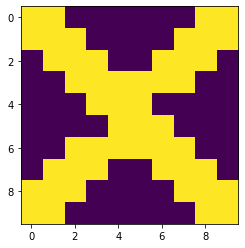

In [12]:
Xn=zeros(N)

for i in range(N):
    for j in range(N):
        Xn[i]+=W[i,j]*X[j]
        
# czy można zoptymalizować powyższą pętlę?

X=sign(Xn)
imshow(reshape(X,(10,10)));

## Zdefiniuj funkcję przekrycia (overlap)
Porównaj końcowy stan sieci z zapamiętanymi wzorcami by określić, który z nich został rozpoznany